Data of large dimensions is a problem since the inter-relationships between those data are difficult to interpret ; more so in absence of an underlying physical phenomena or an equation

To overcome this, we do Principal Component Analysis , which essentially is simple dimensionality reduction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd


Now we create some synthetic data of a multivariate normal distribution with some mean and variance

In [3]:
mu = np.array([10,16])
sigma = np.array([[3.5, -1.8], [-1.8,3.5]])

syntheticData = rnd.multivariate_normal(mu, sigma, 1000)



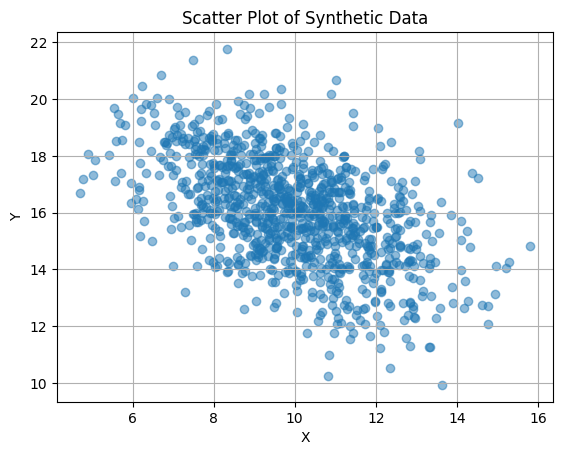

In [8]:
x = syntheticData[:, 0]
y = syntheticData[:, 1]

plt.scatter(x, y, alpha=0.5)
plt.title('Scatter Plot of Synthetic Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

Now we perform mean-centering of the data

In [9]:
mean = np.mean(syntheticData, axis=0)
centeredData = syntheticData - mean



<function matplotlib.pyplot.show(close=None, block=None)>

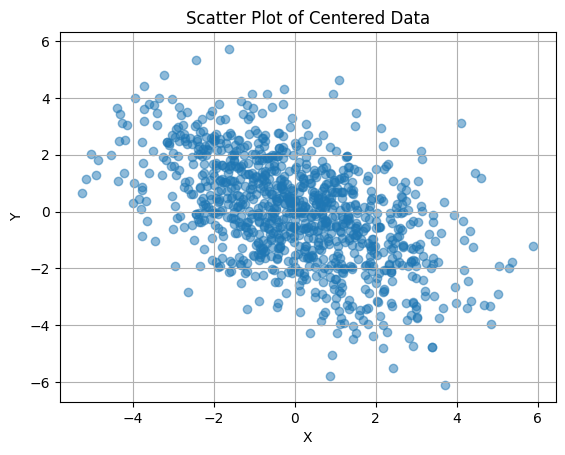

In [10]:
x = centeredData[:, 0]
y = centeredData[:, 1]

plt.scatter(x, y, alpha=0.5)
plt.title('Scatter Plot of Centered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show

Now we compute the covariance matrix

In [11]:
cov = np.cov(centeredData.T)
cov = np.round(cov,2)


Now, we perform the eigen decomposition of the covariance matrix and we will get eigen vectors and eigen values

Each eigen vector represents a direction of variance ; the eigen vector corresponding to the largest eigen value will give the direction of maximum variance ;  this is the first principal component

Then, the eigen vector corresponding to the 2nd largest eigen value will give the direction of the second largest variance ; this is the second principal component

And, so on

So, we need to sort the eigen vectors according to descending order of eigen values

Remember, all eigen vectors are orthogonal to each other.

In [12]:
eig_val, eig_vec = np.linalg.eig(cov)
eig_val = np.round(eig_val,2)
eig_vec = np.round(eig_vec,2)

In [13]:
indices = np.arange(0, len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val,indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]



Now we have sorted eigenvalues

In [14]:
eig_val

array([5.28, 1.7 ])

In [15]:
eig_vec

array([[ 0.71,  0.7 ],
       [-0.7 ,  0.71]])

Now we may normalize the eigenvalues , for better comparisons

In [19]:
eig_val_sum = np.sum(eig_val)
normalized_eigenvalues  = eig_val/eig_val_sum
normalized_eigenvalues

array([0.75644699, 0.24355301])

Now we may construct a cumulative distribution of these eigenvalues

In [20]:
cumulative_variance = np.cumsum(normalized_eigenvalues)
cumulative_variance

array([0.75644699, 1.        ])

In [21]:
pca_data = np.dot(centeredData, eig_vec)
pca_data

array([[-3.22666376,  0.41989559],
       [-0.65912002, -2.49847147],
       [-3.15762781,  0.38808533],
       ...,
       [ 3.26050579,  0.78119237],
       [-2.06648139, -0.73602035],
       [-0.55089187,  1.65645627]])

<function matplotlib.pyplot.show(close=None, block=None)>

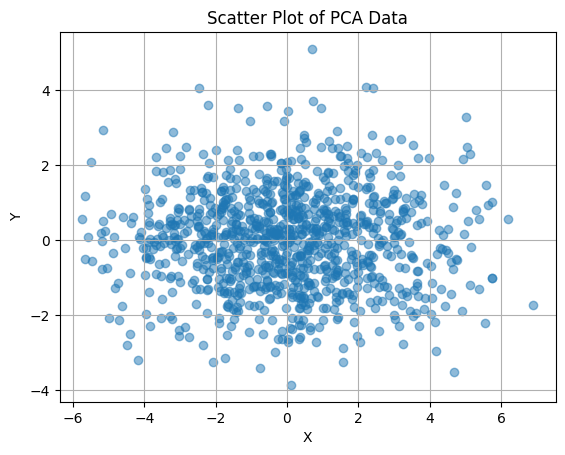

In [22]:
x = pca_data[:, 0]
y = pca_data[:, 1]

plt.scatter(x, y, alpha=0.5)
plt.title('Scatter Plot of PCA Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show

Reverse PCA Transformation

<function matplotlib.pyplot.show(close=None, block=None)>

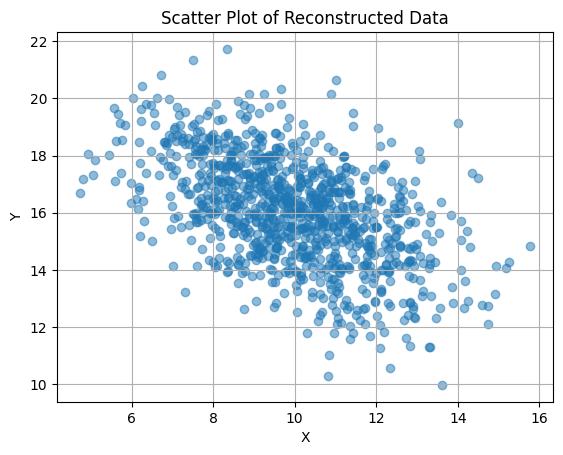

In [24]:
recon_data = pca_data.dot(eig_vec.T) + mean
x = recon_data[:,0]
y = recon_data[:,1]

plt.scatter(x, y, alpha=0.5)
plt.title('Scatter Plot of Reconstructed Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show

In [27]:
loss = np.mean(np.square(syntheticData - recon_data))
loss

0.00012126978893011832

Nice loss :)